# Clustering of Iris Dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# Importing data

In [2]:
df = pd.read_csv('Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Checking the Species distribution in given data

In [5]:
df["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

# Seperating the Data based on Species

In [6]:
Iris_setosa = df.loc[df["Species"]=="Iris-setosa"]
Iris_virginica  = df.loc[df["Species"]=="Iris-virginica"]
Iris_versicolor = df.loc[df["Species"]=="Iris-versicolor"]

# Visualizing the Seperated Data
This should be our final result. 
The graph is plotted with parameters Sepal Length and Sepal Width

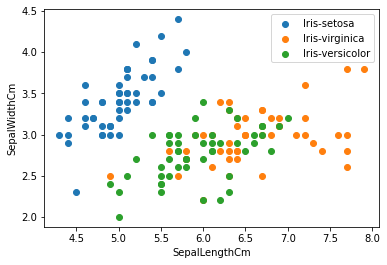

In [7]:
plt.scatter(Iris_setosa["SepalLengthCm"],Iris_setosa['SepalWidthCm'], label="Iris-setosa")
plt.scatter(Iris_virginica["SepalLengthCm"],Iris_virginica['SepalWidthCm'], label="Iris-virginica")
plt.scatter(Iris_versicolor["SepalLengthCm"],Iris_versicolor['SepalWidthCm'], label="Iris-versicolor")
plt.xlabel("SepalLengthCm")
plt.ylabel("SepalWidthCm")
plt.legend()
plt.show()

The graph is plotted with parameters Petal Length and Petal Width

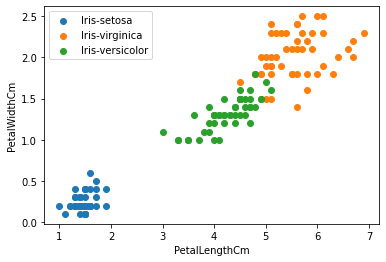

In [9]:
plt.scatter(Iris_setosa["PetalLengthCm"],Iris_setosa['PetalWidthCm'], label="Iris-setosa")
plt.scatter(Iris_virginica["PetalLengthCm"],Iris_virginica['PetalWidthCm'], label="Iris-virginica")
plt.scatter(Iris_versicolor["PetalLengthCm"],Iris_versicolor['PetalWidthCm'], label="Iris-versicolor")
plt.xlabel("PetalLengthCm")
plt.ylabel("PetalWidthCm")
plt.legend()
plt.show()

# Clustering Based on Sepal length and Width

In [10]:
df1 = df.loc[:,['SepalLengthCm','SepalWidthCm']]
df2 = df.loc[:,['PetalLengthCm','PetalWidthCm']]

In [11]:
mms = MinMaxScaler()
mms.fit(df1)
data_transformed = mms.transform(df1)

# Raw data visualization

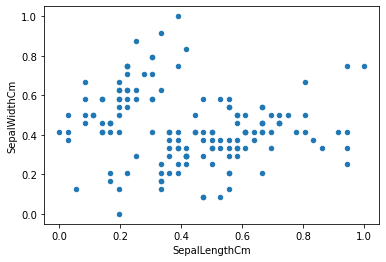

In [15]:
data_transformed = pd.DataFrame(data_transformed, columns=['SepalLengthCm','SepalWidthCm'])
data_transformed.plot(kind="scatter", x='SepalLengthCm', y='SepalWidthCm')

# Elbow curve method to know optimal number of clusters

In [16]:
sum_of_squared_distance=[]
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    sum_of_squared_distance.append(km.inertia_)

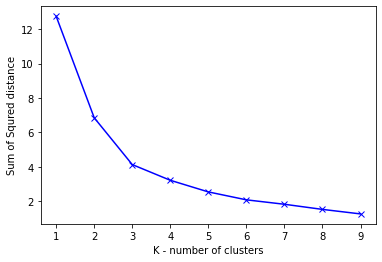

In [17]:
plt.plot(K, sum_of_squared_distance, 'bx-')
plt.xlabel('K - number of clusters')
plt.ylabel('Sum of Squred distance')
plt.show()

In [18]:
km = KMeans(n_clusters=3)
km.fit(df1)
y_kmeans = km.predict(df1)

In [19]:
result = km.labels_
result

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [20]:
centroids = km.cluster_centers_
centroids

array([[6.81276596, 3.07446809],
       [5.006     , 3.418     ],
       [5.77358491, 2.69245283]])

# Actual Result of clustering Based on Sepal Length and Width

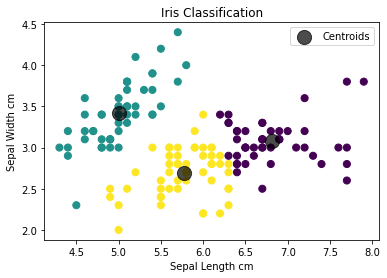

In [22]:
plt.scatter(df1['SepalLengthCm'], df1['SepalWidthCm'], c=y_kmeans, s=50)
plt.scatter(centroids[:,0],centroids[:,1], c='black', s=200, alpha=0.7, label="Centroids")
plt.title("Iris Classification")
plt.xlabel('Sepal Length cm')
plt.ylabel('Sepal Width cm')
plt.legend()

# Clustering Based on Sepal length and Width

In [23]:
mms = MinMaxScaler()
mms.fit(df2)
data_transformed = mms.transform(df2)

# Raw Data Visualization

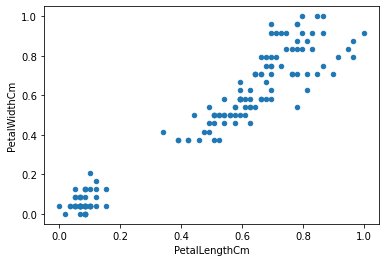

In [24]:
data_transformed = pd.DataFrame(data_transformed, columns=['PetalLengthCm','PetalWidthCm'])
data_transformed.plot(kind="scatter", x='PetalLengthCm', y='PetalWidthCm')

# The Elbow curve to know optimal number of clusters

In [25]:
sum_of_squared_distance=[]
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    sum_of_squared_distance.append(km.inertia_)

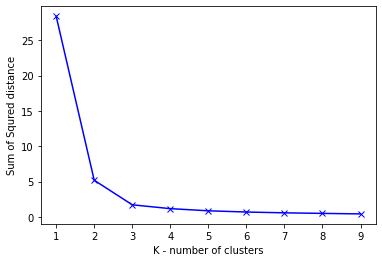

In [26]:
plt.plot(K, sum_of_squared_distance, 'bx-')
plt.xlabel('K - number of clusters')
plt.ylabel('Sum of Squred distance')
plt.show()

In [27]:
km = KMeans(n_clusters=3)
km.fit(df2)
y_kmeans = km.predict(df2)

In [28]:
result = km.labels_
result

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [29]:
centroids2 = km.cluster_centers_
centroids2

array([[1.464     , 0.244     ],
       [5.59583333, 2.0375    ],
       [4.26923077, 1.34230769]])

# Actual Result of clustering Based on Petal Length and Width

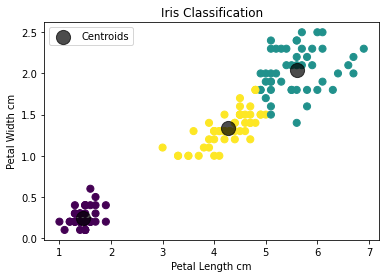

In [30]:
plt.scatter(df2['PetalLengthCm'], df2['PetalWidthCm'], c=y_kmeans, s=50)
plt.scatter(centroids2[:,0],centroids2[:,1], c='black', s=200, alpha=0.7, label="Centroids")
plt.title("Iris Classification")
plt.xlabel('Petal Length cm')
plt.ylabel('Petal Width cm')
plt.legend()